# Loan approval prediction

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
import category_encoders as ce
from category_encoders import TargetEncoder

# For performing train/test/split
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# import all the models
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.impute import KNNImputer

# For computing accuracy score
from sklearn.metrics import accuracy_score, auc, roc_curve,f1_score,precision_score,precision_recall_curve, classification_report,confusion_matrix,plot_confusion_matrix
from sklearn import metrics

### Read Dataset

In [2]:
dataset = pd.read_csv('dataset-workshop.csv')

In [3]:
dataset.shape

(1003, 22)

In [4]:
display(dataset.head(5))
display(dataset.tail(5))

,Unnamed: 0,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,accepted
0,0,0_checking,6,Critical_acct_other_credits_existing,radio/television,3380.000000,Unknown_or_no_savings_acct,>7yrs,4,male_single,...,real_estate,NaN,none,own,2,skilled_employee/official,1,yes,yes,0
1,1,from_0_to_200,48,Existing_credits_paid_till_now,radio/television,6940.208336,<100DM,1_to_4yrs,2,female_divorced/separated/married,...,real_estate,22.0,none,own,1,skilled_employee/official,1,none,yes,1
2,2,None,12,Critical_acct_other_credits_existing,education,1902.370483,<100DM,4_to_7yrs,2,male_single,...,real_estate,49.0,none,own,1,unskilled_resident,2,none,yes,0
3,3,0_checking,42,Existing_credits_paid_till_now,furniture/equipment,1097.000000,<100DM,4_to_7yrs,2,male_single,...,building_society_savings_agreement/life_insurance,45.0,none,for_free,1,skilled_employee/official,2,none,yes,0
4,4,0_checking,24,Delay_in_past,new_car,9021.266894,<100DM,1_to_4yrs,3,male_single,...,unknown/no_property,53.0,none,for_free,2,skilled_employee/official,2,none,yes,1


,Unnamed: 0,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,accepted
998,998,None,12,Existing_credits_paid_till_now,furniture/equipment,3143.481540,<100DM,4_to_7yrs,3,female_divorced/separated/married,...,real_estate,31.0,none,own,1,unskilled_resident,1,none,yes,0
999,999,0_checking,30,Existing_credits_paid_till_now,used_car,4200.276629,<100DM,1_to_4yrs,4,male_divorced/separated,...,building_society_savings_agreement/life_insurance,40.0,none,own,1,management_self-employed_highly_qualified/officer,1,yes,yes,0
1000,1000,None,12,Existing_credits_paid_till_now,radio/television,1094.000000,<100DM,>7yrs,4,male_single,...,car_or_other_nonsavings,38.0,none,own,1,skilled_employee/official,1,none,yes,0
1001,1001,0_checking,45,Existing_credits_paid_till_now,radio/television,5141.020803,<100DM,1_to_4yrs,4,male_single,...,unknown/no_property,23.0,none,for_free,1,skilled_employee/official,1,yes,yes,1
1002,1002,from_0_to_200,None,Critical_acct_other_credits_existing,used_car,2290.381527,100_to_500DM,unemployed,3,male_single,...,car_or_other_nonsavings,27.0,none,own,1,skilled_employee/official,1,none,yes,0


#### Note: Feature "Unnamed: 0" is identical to index column and will be deleted.

In [5]:
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
dataset.head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,accepted
0,0_checking,6,Critical_acct_other_credits_existing,radio/television,3380.000000,Unknown_or_no_savings_acct,>7yrs,4,male_single,None,...,real_estate,NaN,none,own,2,skilled_employee/official,1,yes,yes,0
1,from_0_to_200,48,Existing_credits_paid_till_now,radio/television,6940.208336,<100DM,1_to_4yrs,2,female_divorced/separated/married,None,...,real_estate,22.0,none,own,1,skilled_employee/official,1,none,yes,1
2,None,12,Critical_acct_other_credits_existing,education,1902.370483,<100DM,4_to_7yrs,2,male_single,None,...,real_estate,49.0,none,own,1,unskilled_resident,2,none,yes,0
3,0_checking,42,Existing_credits_paid_till_now,furniture/equipment,1097.000000,<100DM,4_to_7yrs,2,male_single,guarantor,...,building_society_savings_agreement/life_insurance,45.0,none,for_free,1,skilled_employee/official,2,none,yes,0
4,0_checking,24,Delay_in_past,new_car,9021.266894,<100DM,1_to_4yrs,3,male_single,None,...,unknown/no_property,53.0,none,for_free,2,skilled_employee/official,2,none,yes,1


In [7]:
dataset[dataset.duplicated() == True]

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,accepted


#### Note: There are no duplicate instances/rows

### Data Analysis

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1003 non-null   object 
 1   duration                1003 non-null   object 
 2   credit_history          1003 non-null   object 
 3   purpose                 1003 non-null   object 
 4   credit_amount           1003 non-null   float64
 5   savings_status          1003 non-null   object 
 6   employment              1003 non-null   object 
 7   installment_commitment  1003 non-null   int64  
 8   personal_status         1003 non-null   object 
 9   other_parties           1003 non-null   object 
 10  residence_since         1003 non-null   int64  
 11  property_magnitude      1003 non-null   object 
 12  age                     953 non-null    float64
 13  other_payment_plans     1003 non-null   object 
 14  housing                 1003 non-null   

In [9]:
dataset.isnull().sum()

checking_status            0
duration                   0
credit_history             0
purpose                    0
credit_amount              0
savings_status             0
employment                 0
installment_commitment     0
personal_status            0
other_parties              0
residence_since            0
property_magnitude         0
age                       50
other_payment_plans        0
housing                    0
existing_credits           0
job                        0
num_dependents             0
own_telephone              0
foreign_worker             0
accepted                   0
dtype: int64

#### Note: Feature "Age" has 50 missing values.

In [10]:
dataset.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
checking_status,1003,7,None,394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,1003,34,24,174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
credit_history,1003,6,Existing_credits_paid_till_now,503,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purpose,1003,12,radio/television,282,NaN,NaN,NaN,NaN,NaN,NaN,NaN
credit_amount,1003.0,NaN,NaN,NaN,4504.065569,3656.278869,505.0,1918.697453,3667.064141,5896.315833,27389.0
savings_status,1003,5,<100DM,605,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment,1003,5,1_to_4yrs,339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment_commitment,1003.0,NaN,NaN,NaN,2.973081,1.117933,1.0,2.0,3.0,4.0,4.0
personal_status,1003,5,male_single,551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
other_parties,1003,3,None,910,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
cat_columns = []
num_columns = []
print("Numeric columns")
for column in dataset.columns:
    if is_numeric_dtype(dataset[column]):
        num_columns.append(column)
        print(column)
print('Number of Numeric columns:', len(num_columns))
print("----------------------------------")        
print("Category columns")        
for column in dataset.columns:
    if is_string_dtype(dataset[column]):
        cat_columns.append(column)
        print(column)
print('Number of Category columns:', len(cat_columns))

Numeric columns
credit_amount
installment_commitment
residence_since
age
existing_credits
num_dependents
accepted
Number of Numeric columns: 7
----------------------------------
Category columns
checking_status
duration
credit_history
purpose
savings_status
employment
personal_status
other_parties
property_magnitude
other_payment_plans
housing
job
own_telephone
foreign_worker
Number of Category columns: 14


#### Note: There are 7 numeric and 14 categorical features.

In [12]:
cat_col = dataset[cat_columns]
display(cat_col.head(5))
num_col = dataset[num_columns]
display(num_col.head(5))

,checking_status,duration,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker
0,0_checking,6,Critical_acct_other_credits_existing,radio/television,Unknown_or_no_savings_acct,>7yrs,male_single,None,real_estate,none,own,skilled_employee/official,yes,yes
1,from_0_to_200,48,Existing_credits_paid_till_now,radio/television,<100DM,1_to_4yrs,female_divorced/separated/married,None,real_estate,none,own,skilled_employee/official,none,yes
2,None,12,Critical_acct_other_credits_existing,education,<100DM,4_to_7yrs,male_single,None,real_estate,none,own,unskilled_resident,none,yes
3,0_checking,42,Existing_credits_paid_till_now,furniture/equipment,<100DM,4_to_7yrs,male_single,guarantor,building_society_savings_agreement/life_insurance,none,for_free,skilled_employee/official,none,yes
4,0_checking,24,Delay_in_past,new_car,<100DM,1_to_4yrs,male_single,None,unknown/no_property,none,for_free,skilled_employee/official,none,yes


,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,accepted
0,3380.000000,4,4,NaN,2,1,0
1,6940.208336,2,2,22.0,1,1,1
2,1902.370483,2,3,49.0,1,2,0
3,1097.000000,2,4,45.0,1,2,0
4,9021.266894,3,4,53.0,2,2,1


### EDA

#### **Target Variable**
'accepted' is our target as that is the dependent variable we are trying to predict.

Target Variable
accepted
0    703
1    300
Name: accepted, dtype: int64


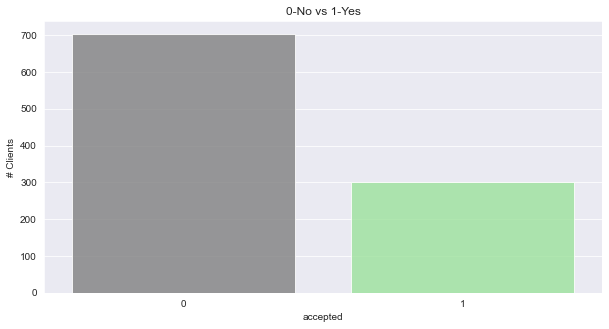

In [13]:
# default count
print('Target Variable')
print(dataset.groupby(['accepted'])['accepted'].count())

# Target Variable Countplot
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(dataset['accepted'], alpha =.80, palette= ['grey','lightgreen'])
plt.title('0-No vs 1-Yes')
plt.ylabel('# Clients')
plt.show()

#### Note: Dataset is not balanced, there are 703 instances which do not have loan approved, and 300 which have loan approved.

### Univariate analysis of Categorical Features

#### Analysis of unique values

In [14]:
for cols in cat_col.columns:
    print(f'Number of unique values for: {cols}= {cat_col[cols].nunique()}')
    print(cat_col[cols].unique())
    print('----------------------------')

Number of unique values for: checking_status= 7
['0_checking' 'from_0_to_200' 'None' 'zero_checking' 'more_than_200'
 'from_zero_to_200' 'more_then_200']
----------------------------
Number of unique values for: duration= 34
['6' '48' '12' '42' '24' '36' '30' 'None' '15' '9' '10' '7' '60' '18`'
 '45' '11' '27' '8' '54' '20' '14' '33' '21' '16' '4' '47' '13' '22' '28'
 '5' '39' '26' '72' '40']
----------------------------
Number of unique values for: credit_history= 6
['Critical_acct_other_credits_existing' 'Existing_credits_paid_till_now'
 'Delay_in_past' 'None' 'No_credits_taken_or_all_paid'
 'All_credits_paid_duly']
----------------------------
Number of unique values for: purpose= 12
['radio/television' 'education' 'furniture/equipment' 'new_car' 'used_car'
 'newcar' 'business' 'usedcar' 'domestic_appliances' 'repairs' 'other'
 'retraining']
----------------------------
Number of unique values for: savings_status= 5
['Unknown_or_no_savings_acct' '<100DM' '500_to_1000DM' '>1000DM'
 '

#### Note: Values of some features will be unified and typing mistakes will be changed.

In [15]:
dataset['checking_status'].unique()

array(['0_checking', 'from_0_to_200', 'None', 'zero_checking',
       'more_than_200', 'from_zero_to_200', 'more_then_200'], dtype=object)

In [16]:
dataset['checking_status'].replace({'0_checking':'0', 'from_0_to_200':'0 - 200', 'None':'0', 'zero_checking':'0', 'more_than_200':'>200', 'from_zero_to_200':'0 - 200', 'more_then_200':'>200'}, inplace=True)

In [17]:
dataset['checking_status'].unique()

array(['0', '0 - 200', '>200'], dtype=object)

#### Note: Feature "checking_status" is unified to three different unique values.

In [18]:
dataset['personal_status'].unique()

array(['male_single', 'female_divorced/separated/married',
       'male_divorced/separated', 'male_married/widowed',
       'feemale_divorced/separated/married'], dtype=object)

In [19]:
dataset['personal_status'].replace({'female_divorced/separated/married': 'female_other', 'male_divorced/separated' : 'male_other', 'male_married/widowed': 'male_other',
       'feemale_divorced/separated/married':'female_other'}, inplace=True)

In [20]:
dataset['personal_status'].unique()

array(['male_single', 'female_other', 'male_other'], dtype=object)

#### Note: Feature "personal_status" is unified to three different unique values.

In [21]:
dataset['purpose'].unique()

array(['radio/television', 'education', 'furniture/equipment', 'new_car',
       'used_car', 'newcar', 'business', 'usedcar', 'domestic_appliances',
       'repairs', 'other', 'retraining'], dtype=object)

In [22]:
dataset['purpose'].replace({'newcar': 'new_car' , 'usedcar': 'used_car'}, inplace=True)

In [23]:
dataset['purpose'].unique()

array(['radio/television', 'education', 'furniture/equipment', 'new_car',
       'used_car', 'business', 'domestic_appliances', 'repairs', 'other',
       'retraining'], dtype=object)

#### Note: Typing mistakes within feature "purpose" are corrected.

In [24]:
dataset['duration'].unique()

array(['6', '48', '12', '42', '24', '36', '30', 'None', '15', '9', '10',
       '7', '60', '18`', '45', '11', '27', '8', '54', '20', '14', '33',
       '21', '16', '4', '47', '13', '22', '28', '5', '39', '26', '72',
       '40'], dtype=object)

In [25]:
dataset['duration'].replace({'None': '0', '18`': '18' }, inplace=True)

In [26]:
dataset['duration'].unique()

array(['6', '48', '12', '42', '24', '36', '30', '0', '15', '9', '10', '7',
       '60', '18', '45', '11', '27', '8', '54', '20', '14', '33', '21',
       '16', '4', '47', '13', '22', '28', '5', '39', '26', '72', '40'],
      dtype=object)

#### Note: Typing mistakes within feature "duration" are corrected, and value "None" is considered to be "0". This feature can be converted to numerical.

In [27]:
dataset['credit_history'].unique()

array(['Critical_acct_other_credits_existing',
       'Existing_credits_paid_till_now', 'Delay_in_past', 'None',
       'No_credits_taken_or_all_paid', 'All_credits_paid_duly'],
      dtype=object)

In [28]:
dataset['credit_history'].replace({'No_credits_taken_or_all_paid': 'None' }, inplace=True)

In [29]:
dataset['credit_history'].unique()

array(['Critical_acct_other_credits_existing',
       'Existing_credits_paid_till_now', 'Delay_in_past', 'None',
       'All_credits_paid_duly'], dtype=object)

#### Note: Values within feature "duration" are unified.

In [30]:
dataset['own_telephone'].unique()

array(['yes', 'none'], dtype=object)

In [31]:
dataset['own_telephone'].replace({'none': 'no' }, inplace=True)

In [32]:
dataset['own_telephone'].unique()

array(['yes', 'no'], dtype=object)

#### Note: Value "none" within feature "own_telephone" is considered to be "no".

In [33]:
for i in cat_col:
    print('Column:', [i])
    print(dataset[i].unique())
    print('--------')

Column: ['checking_status']
['0' '0 - 200' '>200']
--------
Column: ['duration']
['6' '48' '12' '42' '24' '36' '30' '0' '15' '9' '10' '7' '60' '18' '45'
 '11' '27' '8' '54' '20' '14' '33' '21' '16' '4' '47' '13' '22' '28' '5'
 '39' '26' '72' '40']
--------
Column: ['credit_history']
['Critical_acct_other_credits_existing' 'Existing_credits_paid_till_now'
 'Delay_in_past' 'None' 'All_credits_paid_duly']
--------
Column: ['purpose']
['radio/television' 'education' 'furniture/equipment' 'new_car' 'used_car'
 'business' 'domestic_appliances' 'repairs' 'other' 'retraining']
--------
Column: ['savings_status']
['Unknown_or_no_savings_acct' '<100DM' '500_to_1000DM' '>1000DM'
 '100_to_500DM']
--------
Column: ['employment']
['>7yrs' '1_to_4yrs' '4_to_7yrs' 'unemployed' '<1yr']
--------
Column: ['personal_status']
['male_single' 'female_other' 'male_other']
--------
Column: ['other_parties']
['None' 'guarantor' 'co-applicant']
--------
Column: ['property_magnitude']
['real_estate' 'building_soc

#### Note: Feature "duration" is converted to numeric.

In [34]:
dataset['duration'] = pd.to_numeric(dataset['duration'], errors='coerce')
dataset['duration'].unique()

array([ 6, 48, 12, 42, 24, 36, 30,  0, 15,  9, 10,  7, 60, 18, 45, 11, 27,
        8, 54, 20, 14, 33, 21, 16,  4, 47, 13, 22, 28,  5, 39, 26, 72, 40],
      dtype=int64)

In [35]:
cat_columns = []
num_columns = []
print("Numeric columns")
for column in dataset.columns:
    if is_numeric_dtype(dataset[column]):
        num_columns.append(column)
        print(column)
print('Number of Numeric columns:', len(num_columns))
print("----------------------------------")        
print("Category columns")        
for column in dataset.columns:
    if is_string_dtype(dataset[column]):
        cat_columns.append(column)
        print(column)
print('Number of Category columns:', len(cat_columns))

Numeric columns
duration
credit_amount
installment_commitment
residence_since
age
existing_credits
num_dependents
accepted
Number of Numeric columns: 8
----------------------------------
Category columns
checking_status
credit_history
purpose
savings_status
employment
personal_status
other_parties
property_magnitude
other_payment_plans
housing
job
own_telephone
foreign_worker
Number of Category columns: 13


#### Note: After conversion of feature "duration" from categorical to numeric, there are 8 numeric and 13 categorical features.

In [36]:
# a = 7 #number of rows 
# b = 2 #num of columns
# c = 1 #init counter

# fig = plt.figure(figsize=(32,40))

# for feature in dataset[cat_columns]:
#     plt.subplot(a, b, c)
#     plt.title('{}'.format(feature))
#     plt.xlabel(feature)
#     sns.countplot(dataset[feature])
#     c = c+1    
# plt.show()

### Bivariate analysis of Categorical Features

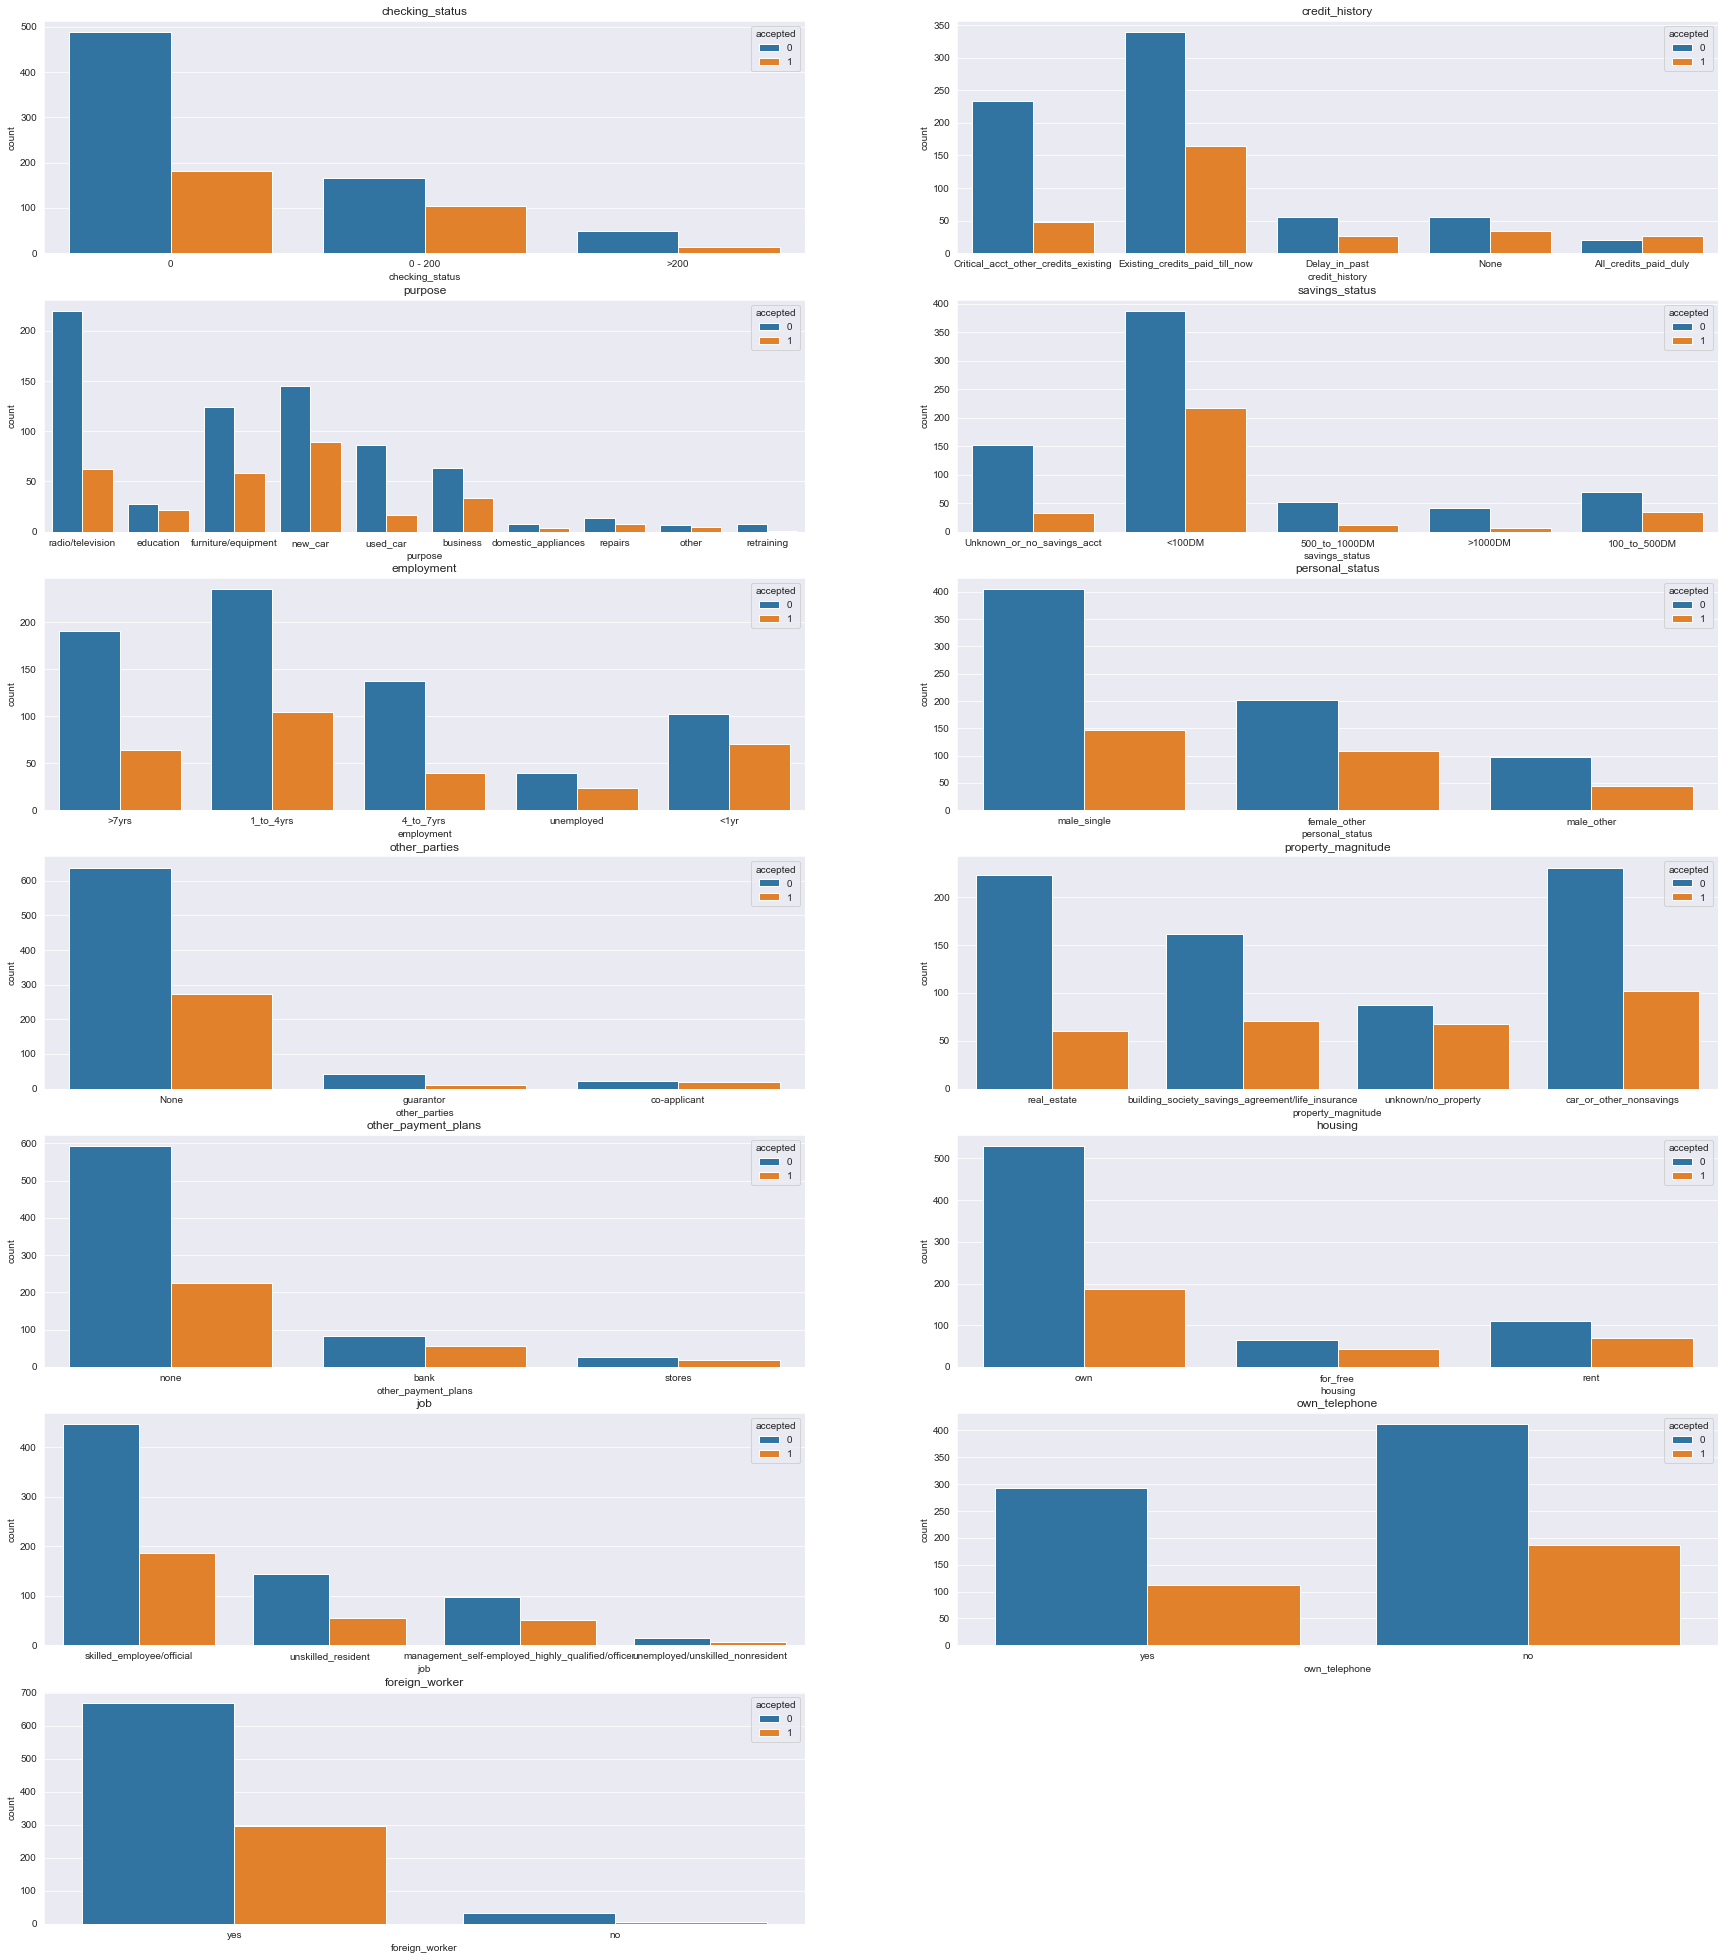

In [37]:
a = 7 #number of rows 
b = 2 #num of columns
c = 1 #init counter

fig = plt.figure(figsize=(30,35))

for feature in dataset[cat_columns]:
    plt.subplot(a, b, c)
    plt.title('{}'.format(feature))
    plt.xlabel(feature)
    sns.countplot(dataset[feature], hue = dataset['accepted'])
    c = c+1
    
plt.show()

#### Note: For categorical features different encoding techniques will be used.

### Analysis of Numerical Features

In [38]:
num_columns

['duration',
 'credit_amount',
 'installment_commitment',
 'residence_since',
 'age',
 'existing_credits',
 'num_dependents',
 'accepted']

### Note: Missing values in "age" column will be filled with the mean value

In [39]:
dataset['age'].mean()

35.57922350472193

In [40]:
dataset['age'].fillna(dataset['age'].mean(), inplace=True)
dataset['age'] = dataset['age'].astype(np.int64)
dataset['age']

0       35
1       22
2       49
3       45
4       53
        ..
998     31
999     40
1000    38
1001    23
1002    27
Name: age, Length: 1003, dtype: int64

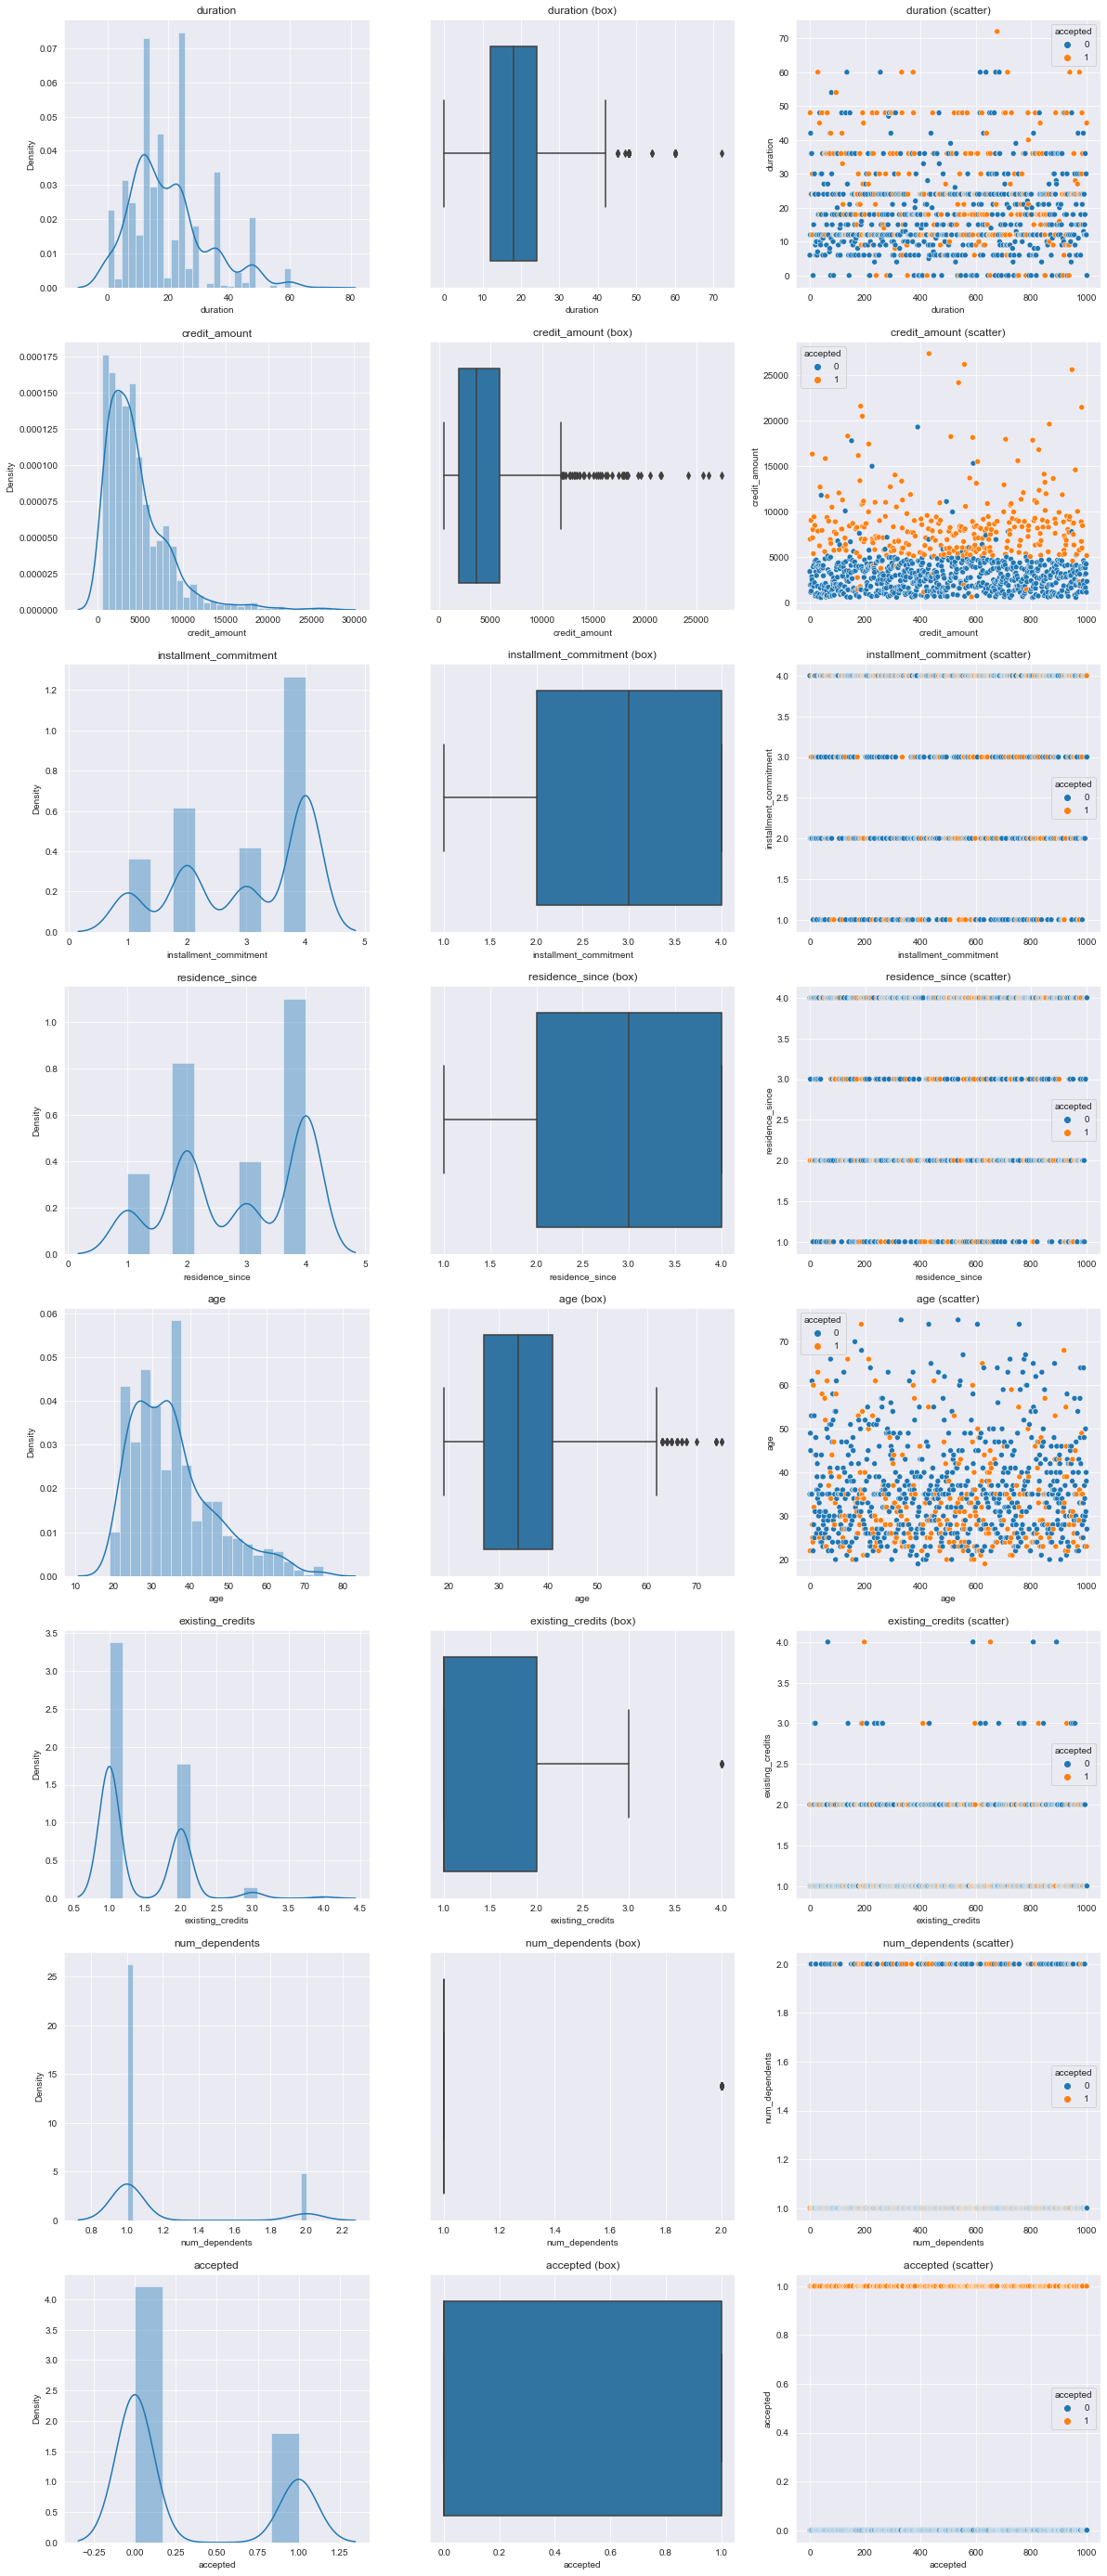

In [41]:
a = 8 #number of rows 
b = 3 #num of columns
c = 1 #init counter

fig = plt.figure(figsize=(20,50))

for feature in dataset[num_columns]:
    plt.subplot(a, b, c)
    plt.title('{}'.format(feature))
    plt.xlabel(feature)
    sns.distplot(dataset[feature], label=feature)
    c = c+1

    plt.subplot(a, b, c)
    plt.title('{} (box)'.format(feature))
    plt.xlabel(feature)
    sns.boxplot(x = dataset[feature])
    c = c+1
    
    plt.subplot(a, b, c)
    plt.title('{} (scatter)'.format(feature))
    plt.xlabel(feature)
    sns.scatterplot(x=dataset.reset_index()['index'] , y = dataset[feature], hue=dataset['accepted'])
    c = c+1

### Note: Features "credit_amount", and "age" have right skewed distribution. They will be log transformed.

### Transformation of Numerical Features

#### log transformation of feature "age"

<AxesSubplot:xlabel='age', ylabel='Density'>

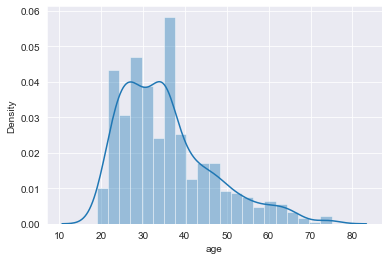

In [42]:
sns.distplot(dataset['age'])

<AxesSubplot:xlabel='age-log', ylabel='Density'>

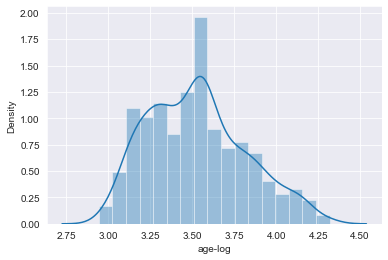

In [43]:
# Converting age to log

dataset['age-log'] = np.log(dataset['age'])
sns.distplot(dataset['age-log'], label='Duration')

In [44]:
dataset[['age','age-log']].head(5)

,age,age-log
0,35,3.555348
1,22,3.091042
2,49,3.891820
3,45,3.806662
4,53,3.970292


#### log transformation of feature "credit_amount"

<AxesSubplot:xlabel='credit_amount', ylabel='Density'>

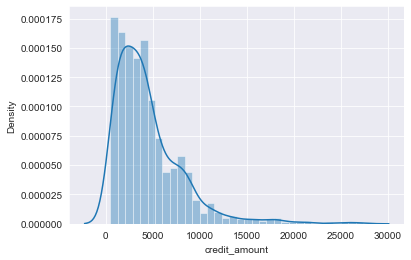

In [45]:
sns.distplot(dataset['credit_amount'])

In [46]:
dataset['credit_amount'].dtype

dtype('float64')

<AxesSubplot:xlabel='credit_amount-log', ylabel='Density'>

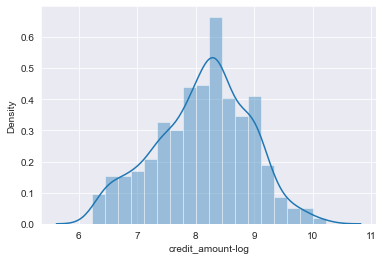

In [47]:
dataset['credit_amount-log'] = np.log(dataset['credit_amount'])
sns.distplot(dataset['credit_amount-log'], label='credit_amount')

In [48]:
dataset[['credit_amount','credit_amount-log']].head(5)

,credit_amount,credit_amount-log
0,3380.000000,8.125631
1,6940.208336,8.845087
2,1902.370483,7.550856
3,1097.000000,7.000334
4,9021.266894,9.107340


In [49]:
dataset.shape

(1003, 23)

#### Droping initial columns age and credit_amount

In [50]:
dataset.drop(columns= ['age', 'credit_amount'], inplace=True)

In [51]:
dataset.shape

(1003, 21)

In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1003 non-null   object 
 1   duration                1003 non-null   int64  
 2   credit_history          1003 non-null   object 
 3   purpose                 1003 non-null   object 
 4   savings_status          1003 non-null   object 
 5   employment              1003 non-null   object 
 6   installment_commitment  1003 non-null   int64  
 7   personal_status         1003 non-null   object 
 8   other_parties           1003 non-null   object 
 9   residence_since         1003 non-null   int64  
 10  property_magnitude      1003 non-null   object 
 11  other_payment_plans     1003 non-null   object 
 12  housing                 1003 non-null   object 
 13  existing_credits        1003 non-null   int64  
 14  job                     1003 non-null   

#### Scaling numerical features "duration', 'credit_amount-log', and "age-log"

In [53]:
minmax_scaler = MinMaxScaler() 
dataset[['duration', 'credit_amount-log', 'age-log']] = minmax_scaler.fit_transform(dataset[['duration', 'credit_amount-log', 'age-log']].values)
dataset[['duration','credit_amount-log','age-log']]

,duration,credit_amount-log,age-log
0,0.083333,0.476061,0.444929
1,0.666667,0.656225,0.106772
2,0.166667,0.332128,0.689984
3,0.583333,0.194268,0.627963
4,0.333333,0.721898,0.747135
...,...,...,...
998,0.166667,0.457895,0.356541
999,0.416667,0.530470,0.542181
1000,0.166667,0.193582,0.504823
1001,0.625000,0.581080,0.139147


In [54]:
dataset.head(5)

,checking_status,duration,credit_history,purpose,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,...,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,accepted,age-log,credit_amount-log
0,0,0.083333,Critical_acct_other_credits_existing,radio/television,Unknown_or_no_savings_acct,>7yrs,4,male_single,None,4,...,none,own,2,skilled_employee/official,1,yes,yes,0,0.444929,0.476061
1,0 - 200,0.666667,Existing_credits_paid_till_now,radio/television,<100DM,1_to_4yrs,2,female_other,None,2,...,none,own,1,skilled_employee/official,1,no,yes,1,0.106772,0.656225
2,0,0.166667,Critical_acct_other_credits_existing,education,<100DM,4_to_7yrs,2,male_single,None,3,...,none,own,1,unskilled_resident,2,no,yes,0,0.689984,0.332128
3,0,0.583333,Existing_credits_paid_till_now,furniture/equipment,<100DM,4_to_7yrs,2,male_single,guarantor,4,...,none,for_free,1,skilled_employee/official,2,no,yes,0,0.627963,0.194268
4,0,0.333333,Delay_in_past,new_car,<100DM,1_to_4yrs,3,male_single,None,4,...,none,for_free,2,skilled_employee/official,2,no,yes,1,0.747135,0.721898


#### Encoding categorical features

#### One hot encoding

In [55]:
cat_columns

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker']

In [56]:
def one_hot_encoding(dataset, columns):
    ds_new = dataset.copy()
    data_dummies =  pd.get_dummies(dataset[columns])
    dataset_new = pd.concat([ds_new, data_dummies],  axis='columns')
    dataset_new.drop(columns, axis='columns', inplace=True)

    return dataset_new

In [57]:
dataset_one_hot = one_hot_encoding(dataset,cat_columns)
dataset_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 60 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   duration                                                              1003 non-null   float64
 1   installment_commitment                                                1003 non-null   int64  
 2   residence_since                                                       1003 non-null   int64  
 3   existing_credits                                                      1003 non-null   int64  
 4   num_dependents                                                        1003 non-null   int64  
 5   accepted                                                              1003 non-null   int64  
 6   age-log                                                               1003 non-null   float64
 7

#### Target encoding

In [58]:
#pip install --upgrade category_encoders

In [59]:
def target_encoding(dataset, columns, y):
    ds_new = dataset.copy()
    target_encoders = ce.TargetEncoder(cols = columns)
    data_target = target_encoders.fit_transform(dataset[columns], y).add_suffix('_tar_enc')
    dataset_new = pd.concat([ds_new, data_target],  axis='columns')
    dataset_new.drop(columns, axis='columns', inplace=True)

    return dataset_new

In [60]:
#target_cols = ['credit_history','savings_status','employment','property_magnitude','job', 'purpose']
#target_cols
dataset_target = target_encoding(dataset, cat_columns, y=dataset_one_hot['accepted'])
dataset_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     1003 non-null   float64
 1   installment_commitment       1003 non-null   int64  
 2   residence_since              1003 non-null   int64  
 3   existing_credits             1003 non-null   int64  
 4   num_dependents               1003 non-null   int64  
 5   accepted                     1003 non-null   int64  
 6   age-log                      1003 non-null   float64
 7   credit_amount-log            1003 non-null   float64
 8   checking_status_tar_enc      1003 non-null   float64
 9   credit_history_tar_enc       1003 non-null   float64
 10  purpose_tar_enc              1003 non-null   float64
 11  savings_status_tar_enc       1003 non-null   float64
 12  employment_tar_enc           1003 non-null   float64
 13  personal_status_ta

#### Catboost encoding

In [61]:
# cat_boost = ce.CatBoostEncoder(cols = cat_features)

In [62]:
def catboost_encoding(dataset, columns, y):
    ds_new2 = dataset.copy()
    catboost_encoders = ce.CatBoostEncoder(cols = columns)
    data_catboost = catboost_encoders.fit_transform(dataset[columns], y).add_suffix('_cat_enc')
    dataset_new2 = pd.concat([ds_new2, data_catboost],  axis='columns')
    dataset_new2.drop(columns, axis='columns', inplace=True)

    return dataset_new2

In [63]:
#catboost_cols = ['credit_history','savings_status','employment','property_magnitude','job', 'purpose']
#catboost_cols
dataset_catboost = catboost_encoding(dataset, cat_columns, y=dataset_one_hot['accepted'])
dataset_catboost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     1003 non-null   float64
 1   installment_commitment       1003 non-null   int64  
 2   residence_since              1003 non-null   int64  
 3   existing_credits             1003 non-null   int64  
 4   num_dependents               1003 non-null   int64  
 5   accepted                     1003 non-null   int64  
 6   age-log                      1003 non-null   float64
 7   credit_amount-log            1003 non-null   float64
 8   checking_status_cat_enc      1003 non-null   float64
 9   credit_history_cat_enc       1003 non-null   float64
 10  purpose_cat_enc              1003 non-null   float64
 11  savings_status_cat_enc       1003 non-null   float64
 12  employment_cat_enc           1003 non-null   float64
 13  personal_status_ca

#### Testing model with different encoding strategies

#### Random Forest - categorical features are one hot encoded

In [64]:
X_oh = dataset_one_hot.drop(columns='accepted')
y_oh = dataset_one_hot['accepted']

X_train_oh,X_test_oh,y_train_oh,y_test_oh=train_test_split(X_oh,y_oh, test_size = 0.3, random_state = 0)

rf_clf_oh = RandomForestClassifier(random_state=0).fit(X_train_oh, y_train_oh)
y_pred_oh=rf_clf_oh.predict(X_test_oh)

rf_score_oh = accuracy_score(y_test_oh,y_pred_oh)
print('Accuracy score Random Forest with categorical features being one hot encoded:', rf_score_oh)

Accuracy score Random Forest with categorical features being one hot encoded: 0.946843853820598


#### Random Forest - categorical features are target encoded

In [65]:
X_te = dataset_target.drop(columns='accepted')
y_te = dataset_target['accepted']

X_train_te,X_test_te,y_train_te,y_test_te=train_test_split(X_te,y_te, test_size = 0.3, random_state = 0)

rf_clf_te = RandomForestClassifier(random_state=0).fit(X_train_te, y_train_te)
y_pred_te=rf_clf_te.predict(X_test_te)

rf_score_te = accuracy_score(y_test_te,y_pred_te)
print('Accuracy score Random Forest with categorical features being target encoded:', rf_score_te)

Accuracy score Random Forest with categorical features being target encoded: 0.9401993355481728


#### Random Forest - categorical features are catboost encoded

In [66]:
X_ce = dataset_catboost.drop(columns='accepted')
y_ce = dataset_catboost['accepted']

X_train_ce,X_test_ce,y_train_ce,y_test_ce=train_test_split(X_ce,y_ce, test_size = 0.3, random_state = 0)

rf_clf_ce = RandomForestClassifier(random_state=0).fit(X_train_ce, y_train_ce)
y_pred_ce = rf_clf_ce.predict(X_test_ce)

rf_score_ce =accuracy_score(y_test_ce,y_pred_ce)
print('Accuracy score Random Forest with categorical features being catboost encoded:',rf_score_ce)

Accuracy score Random Forest with categorical features being catboost encoded: 0.9435215946843853


#### Conclusion: Random Forest Classifier shows better score when categorical features are one hot encoded. Different encoding strategies can be implemented within categorical features. 

### Testing model with combined encoding strategies for categorical features

In [67]:
dataset_one_hot_combo = one_hot_encoding(dataset,['checking_status','personal_status','other_parties','other_payment_plans','housing','own_telephone','foreign_worker'])
dataset_one_hot_combo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      1003 non-null   float64
 1   credit_history                1003 non-null   object 
 2   purpose                       1003 non-null   object 
 3   savings_status                1003 non-null   object 
 4   employment                    1003 non-null   object 
 5   installment_commitment        1003 non-null   int64  
 6   residence_since               1003 non-null   int64  
 7   property_magnitude            1003 non-null   object 
 8   existing_credits              1003 non-null   int64  
 9   job                           1003 non-null   object 
 10  num_dependents                1003 non-null   int64  
 11  accepted                      1003 non-null   int64  
 12  age-log                       1003 non-null   float64
 13  cre

In [68]:
target_cols = ['credit_history','savings_status','employment','property_magnitude','job', 'purpose']
#target_cols
dataset_target_combo = target_encoding(dataset_one_hot_combo, target_cols, y=dataset_one_hot_combo['accepted'])
dataset_target_combo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      1003 non-null   float64
 1   installment_commitment        1003 non-null   int64  
 2   residence_since               1003 non-null   int64  
 3   existing_credits              1003 non-null   int64  
 4   num_dependents                1003 non-null   int64  
 5   accepted                      1003 non-null   int64  
 6   age-log                       1003 non-null   float64
 7   credit_amount-log             1003 non-null   float64
 8   checking_status_0             1003 non-null   uint8  
 9   checking_status_0 - 200       1003 non-null   uint8  
 10  checking_status_>200          1003 non-null   uint8  
 11  personal_status_female_other  1003 non-null   uint8  
 12  personal_status_male_other    1003 non-null   uint8  
 13  per

In [69]:
X_combo = dataset_target_combo.drop(columns='accepted')
y_combo = dataset_target_combo['accepted']

X_train,X_test,y_train,y_test=train_test_split(X_combo,y_combo, test_size = 0.3, random_state = 0)

rf_clf_combo = RandomForestClassifier(random_state=0).fit(X_train, y_train)
rf_clf_combo
y_pred_combo=rf_clf_combo.predict(X_test)


rf_score_combo=accuracy_score(y_test,y_pred_combo)
rf_score_combo

0.946843853820598

In [70]:
catboost_cols = ['credit_history','savings_status','employment','property_magnitude','job', 'purpose']
catboost_cols
dataset_catboost_combo = catboost_encoding(dataset_one_hot_combo, catboost_cols, y=dataset_one_hot_combo['accepted'])
#dataset_catboost_combo.info()

In [71]:
X_combo2 = dataset_catboost_combo.drop(columns='accepted')
y_combo2 = dataset_catboost_combo['accepted']

X_train,X_test,y_train,y_test=train_test_split(X_combo2,y_combo2, test_size = 0.3, random_state = 0)

rf_clf_CBcombo = RandomForestClassifier(random_state=0).fit(X_train, y_train)
y_pred_CBcombo=rf_clf_CBcombo.predict(X_test)


rf_score_CBcombo=accuracy_score(y_test,y_pred_CBcombo)
rf_score_CBcombo

0.946843853820598

#### Conclusion: Combined encoding of categorical features (combining two encoding techniques: one hot with target encoding, or one hot with catboost) have same results as one hot encoding all categorical features.

#### Precision/recall evaluation

#### Note: Precision/recall evaluation will be made on dataset with all categorical features being one hot encoded due to the best accuracy score

In [72]:
print("Accuracy score Random Forest with categorical features being one hot encoded:",metrics.accuracy_score(y_test_oh, y_pred_oh))
print(classification_report(y_test_oh, y_pred_oh))

Accuracy score Random Forest with categorical features being one hot encoded: 0.946843853820598
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       204
           1       0.91      0.93      0.92        97

    accuracy                           0.95       301
   macro avg       0.94      0.94      0.94       301
weighted avg       0.95      0.95      0.95       301



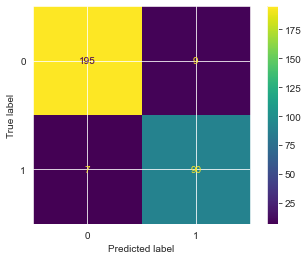

In [73]:
plot_confusion_matrix(rf_clf_oh,
                     X_test_oh,
                     y_test_oh)

#### Note: F1 score is satisfactory close to the accuracy score.